In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py
from astropy.visualization import make_lupton_rgb

import umap
from imageio import imwrite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#cols = ['name', 'ra', 'dec', 'lii', 'bii', 'broad_type', 'rmag', 'bmag', 'optical_flag',
#        'red_psf_flag', 'blue_psf_flag', 'redshift', 'ref_name', 'ref_redshift qso_prob',
#        'radio_name', 'xray_name', 'alt_name_1', 'alt_name_2', 'class']
cols = ['name', 'ra', 'dec']

In [3]:
mq = pd.read_csv('../data/catalogs/heasarc_milliquas.tdat', skiprows=66, error_bad_lines=False, 
                 sep='|', names=cols, header=None, usecols=[0,1,2], index_col=False)

In [4]:
len(mq)
mq

,name,ra,dec
0,WISEA J043431.62-894617.9,68.636919,-89.771636
1,WISEA J094017.96-894442.8,145.076054,-89.745238
2,WISEA J192247.55-893602.5,290.698143,-89.600695
3,WISEA J174333.00-893514.8,265.888724,-89.587456
4,WISEA J214955.49-893435.5,327.481266,-89.576530
...,...,...,...
1986796,WISEA J173224.17+893804.0,263.097125,89.634523
1986797,WISEA J113404.91+893808.4,173.520152,89.635698
1986798,WISEA J150941.89+894148.5,227.424545,89.696821
1986799,WISEA J092900.74+895748.5,142.223308,89.963484


In [5]:
ra_max = 150.8
ra_min = 149.4
dec_max = 2.9
dec_min = 1.6
mq_cosmos = mq[(mq['ra']<ra_max) & (mq['ra']>ra_min)
               & (mq['dec']<dec_max) & (mq['dec']>dec_min)]

In [6]:
print(len(mq_cosmos))
mq_cosmos

1287


,name,ra,dec
591133,CXOC J095957.6+013606,149.990194,1.601766
591144,COSM J09585+0136,149.647222,1.602222
591226,COSM J09593+0136,149.842222,1.605000
591268,J095840.70+013622.9,149.669583,1.606361
591343,SDSS J100129.42+013633.7,150.372592,1.609385
...,...,...,...
628967,SDSS J100046.90+025323.6,150.195419,2.889893
628968,COSM J10007+0253,150.185000,2.890000
629003,SDSS J100035.21+025327.8,150.146713,2.891056
629211,SDSS J100301.09+025355.8,150.754578,2.898846


In [7]:
cat_fn = '../data/hsc_catalogs/pdr2_wide_icmod_20.0-20.5_cosmos.csv'
cat = pd.read_csv(cat_fn)

In [8]:
print(cat.keys())
cat

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'object_id', 'ra_x', 'dec_x', 'tract_x', 'patch_x', 'parent_id_x',
       ...
       'r_cmodel_exp_ellipse_12', 'r_cmodel_dev_ellipse_11',
       'r_cmodel_dev_ellipse_22', 'r_cmodel_dev_ellipse_12',
       'r_cmodel_ellipse_11', 'r_cmodel_ellipse_22', 'r_cmodel_ellipse_12',
       'i_cmodel_ellipse_radius', 'i_cmodel_ellipse_ellipticity',
       'i_cmodel_ellipse_theta'],
      dtype='object', length=181)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,object_id,ra_x,dec_x,tract_x,patch_x,parent_id_x,...,r_cmodel_exp_ellipse_12,r_cmodel_dev_ellipse_11,r_cmodel_dev_ellipse_22,r_cmodel_dev_ellipse_12,r_cmodel_ellipse_11,r_cmodel_ellipse_22,r_cmodel_ellipse_12,i_cmodel_ellipse_radius,i_cmodel_ellipse_ellipticity,i_cmodel_ellipse_theta
0,930469,930469,930469,959426,43153636661928257,149.419824,1.759877,9812,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.962126,0.631997,-72.408003
1,930472,930472,930472,959429,43153636661941675,149.501037,1.628040,9812,1,43153636661922149,...,7.973921e-03,3.500360,17.354601,1.091601e-01,0.508333,2.047580,7.973921e-03,1.913607,0.611278,-88.493481
2,930473,930473,930473,959430,43153636661942071,149.495663,1.632822,9812,1,43153636661922436,...,1.119458e-10,0.000007,0.000007,2.256304e-08,0.000012,0.000012,1.119458e-10,0.009278,0.186135,35.884203
3,930474,930474,930474,959431,43153636661944644,149.494814,1.675906,9812,1,43153636661924395,...,-7.206630e-07,0.000080,0.000086,8.289192e-06,0.000175,0.000173,-7.206630e-07,0.009822,0.305118,4.776509
4,930475,930475,930475,959432,43153636661944760,149.486638,1.676278,9812,1,43153636661924492,...,1.399018e-01,0.387397,0.371909,3.103442e-01,0.270391,0.258992,2.075485e-01,0.822187,0.796321,-44.008288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,937776,937776,937776,966912,43159159989889369,149.507494,2.830884,9813,807,43159159989869051,...,6.452020e-02,0.352902,0.776300,1.751370e-01,0.269721,0.572581,1.237647e-01,1.049147,0.435658,-75.946569
3448,937777,937777,937777,966913,43159159989889446,149.583488,2.832980,9813,807,43159159989869115,...,2.771537e-02,0.104280,0.164310,4.700084e-02,0.103667,0.163101,4.648047e-02,0.498539,0.521982,-62.829638
3449,937778,937778,937778,966914,43159159989890737,149.538152,2.855478,9813,807,43159159989870227,...,1.786133e-07,0.000056,0.000056,2.624067e-07,0.000056,0.000056,2.624067e-07,NaN,NaN,NaN
3450,937779,937779,937779,966915,43159159989890908,149.523731,2.858426,9813,807,43159159989870399,...,2.877730e-01,2.197911,3.968354,1.533630e+00,1.945990,3.503732,1.349615e+00,1.572649,0.294415,-78.585957


In [9]:
arcsec = 1./3600
print(arcsec)

0.0002777777777777778


In [10]:
ra_buf = 2*arcsec
dec_buf = 2*arcsec
matches = []
for i in range(len(cat)):
    #print(i)
    ra = cat['ra_x'][i]
    dec = cat['dec_x'][i]
    for j in mq_cosmos.index:
        ra_mq = mq_cosmos['ra'][j]
        dec_mq = mq_cosmos['dec'][j]
        if abs(ra_mq-ra)<ra_buf and abs(dec_mq-dec)<dec_buf:
            #print(i, ra, dec)
            #print(j, ra_mq, dec_mq)
            matches.append((i,j))

In [11]:
print("Num matches:", len(matches))

Num matches: 103


In [12]:
def plot_sample(ies, labels=None, nrows=2, ncols=8, show_resid=False, random=False):
    print(len(ies))
    nrows = nrows
    ncols = ncols
    fig, axarr = plt.subplots(nrows, ncols, figsize=(15, 15))
    plt.subplots_adjust(hspace=.3, wspace=0)
    if len(ies)>nrows*ncols and random:
        ies_sample = np.random.choice(ies, size=nrows*ncols, replace=False)
    else:
        ies_sample = ies
    cc = 0
    for i in range(nrows):
        for j in range(ncols):
            ie = ies_sample[cc]
            if nrows==1:
                ax = axarr[j]
            else:
                ax = axarr[i][j]
            reali = luptonize(real[ie])
            if show_resid:
                reconi = recon[ie]
                residi = resid[ie]
                im = np.vstack((reali, reconi, residi))
            else:
                im = reali
            ax.imshow(im)
            ax.set_xticks([])
            ax.set_yticks([])
            if labels:
                ax.set_title(labels[cc])
            cc += 1

In [13]:
NBANDS = 3
def get_residuals(reals, recons):
    print("Getting residuals")
    reals = np.array(reals)
    reals = reals.reshape((-1,96,96,NBANDS))
    reals = luptonize(reals).astype('int')
    recons = np.array(recons)
    recons = recons.reshape((-1,96,96,NBANDS)).astype('int')
    resids = abs(reals-recons)
    return resids, reals, recons

In [14]:
def luptonize(x):
    rgb_q = 15
    rgb_stretch = 0.5
    rgb_min = 0
    if x.ndim==3:
        x = make_lupton_rgb(x[:,:,2], x[:,:,1], x[:,:,0],
                      Q=rgb_q, stretch=rgb_stretch, minimum=rgb_min)
    elif x.ndim==4:
        x = np.array([make_lupton_rgb(xi[:,:,2], xi[:,:,1], xi[:,:,0],
                      Q=rgb_q, stretch=rgb_stretch, minimum=rgb_min)
                      for xi in x])
    else:
        raise ValueError(f"Wrong number of dimensions! Gave {x.ndim}, need 3 or 4")
    return x

In [15]:
tag = 'gri_cosmos'
imarr_fn = '../data/images_h5/images_{}.h5'.format(tag)
results_fn = '../results/results_{}.h5'.format(tag)
imarr = h5py.File(imarr_fn, 'r')
res = h5py.File(results_fn, 'r')

In [16]:
scores = res['anomaly_scores']
idxs = res['idxs']
object_ids = res['object_ids']
recon = res['reconstructed']
real = imarr['images']
resid = get_residuals(real, recon)[0]

Getting residuals


In [17]:
id_cosmo_match = np.array([tup[0] for tup in matches])
scores_match = np.array([scores[idc] for idc in id_cosmo_match])
idx_sorted = np.argsort(scores_match)
id_cosmo_match = id_cosmo_match[idx_sorted]
scores_match = scores_match[idx_sorted]
labels = [np.round(s, 2) for s in scores_match]

100


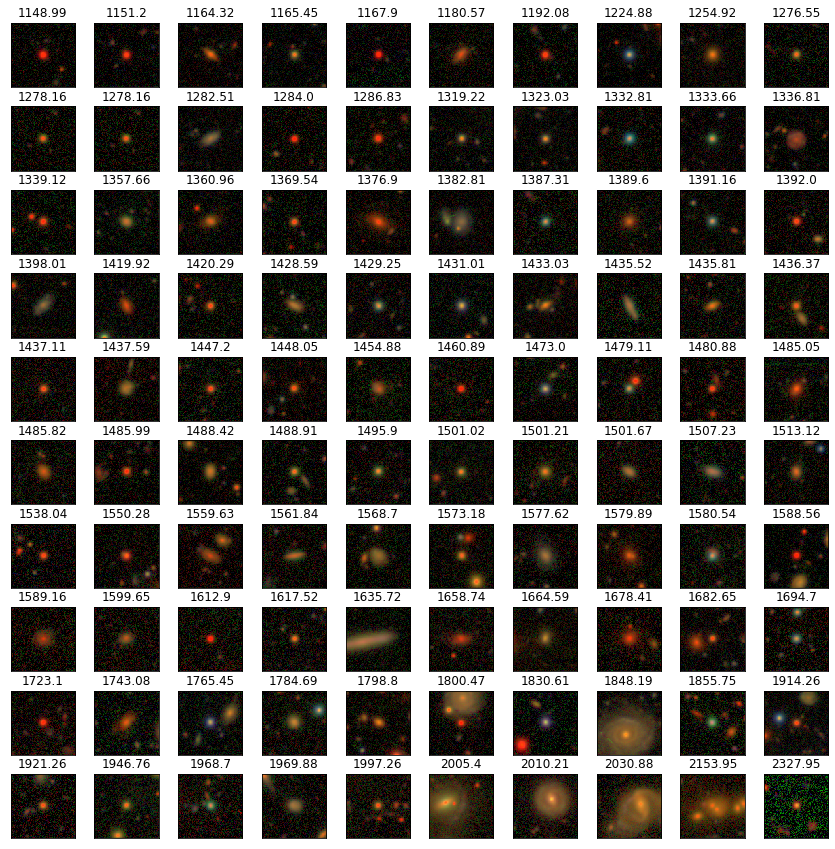

In [18]:
n = 100
plot_sample(id_cosmo_match[-n:], labels=labels[-n:], ncols=10, nrows=10)

In [24]:
for i in range(len(matches)):
    idx = matches[i][0]
    idmq = matches[i][1]
    im = real[idx]
    scoreint = int(scores[idx])
    save_fn = f"../thumbnails/cosmos_targets/quasars/cosmos_idxcosmos{idx}_mqid{idmq}_objectid{cat['object_id'][idx]}_score{scoreint}.png"
    #ims = ims.transpose(3, 1, 2)
    im = luptonize(im)
    imwrite(save_fn, im)

16


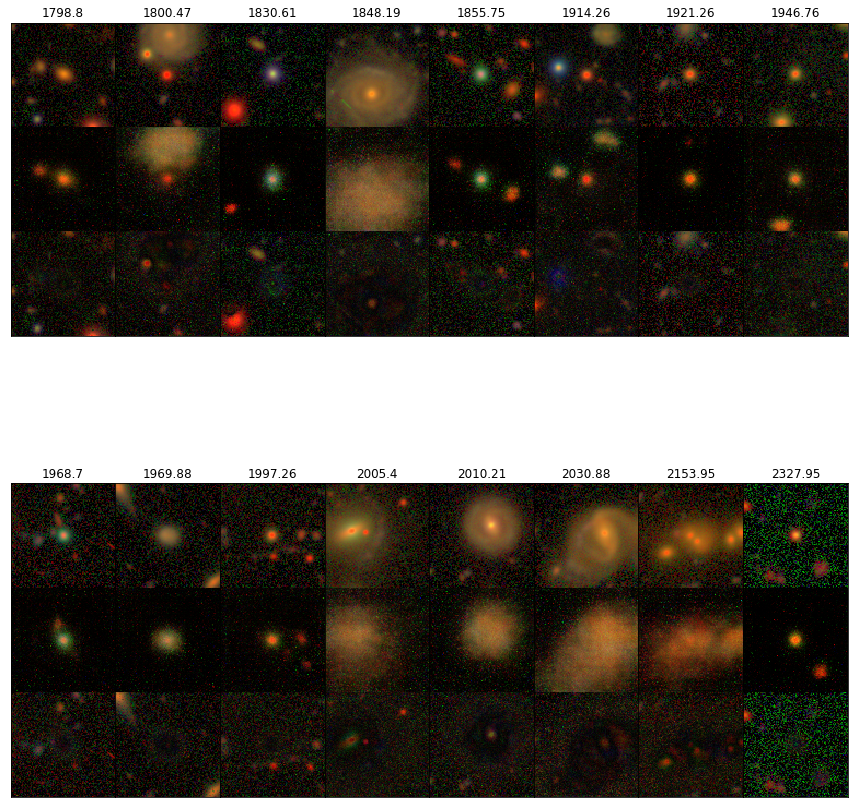

In [19]:
n = -16
plot_sample(id_cosmo_match[n:], labels=labels[n:], ncols=8, nrows=2, show_resid=True)

In [20]:
print(id_cosmo)
cat.iloc[35]
cat.iloc[id_cosmo]

NameError: name 'id_cosmo' is not defined

In [ ]:
id_mq = [tup[1] for tup in matches]
mq_cosmos.loc[id_mq]

In [ ]:
imarr.close()
res.close()